## Notebook para explorar dados de Members
### Members (63.867.246 linhas)
| Campo | Tipo | Observações | Analisado |
|-------|------|-------------|-----------|
| msno | String | Sem valores nulos | ✅ |
| safra | Datetime (YYYYMM) | Sem valores nulos, vai até 201612 | ✅ |
| registration_init_time | Datetime | Sem valores nulos | ✅ |
| city | Int (categoria) | Sem valores nulos | ✅ |
| bd | Int | Sem valores nulos | ✅ |
| gender | String / Nulo (categoria) | Possui valores nulos | ✅ |
| registered_via | Int (categoria) | Sem valores nulos | ✅ |
| is_ativo | Boolean | Sem valores nulos, grande maioria inativa | ✅ |
| registration_init_time_year | Int | (Gerado) Derivado de registration_init_time | ✅ |
| registration_init_time_month | Int | (Gerado) Derivado de registration_init_time | ✅ |
| registration_init_time_day | Int | (Gerado) Derivado de registration_init_time | ✅ |
| registration_init_time_day_of_week | Int | (Gerado) Derivado de registration_init_time | ✅ |
| registration_init_time_day_of_year | Int | (Gerado) Derivado de registration_init_time | ✅ |

<br>

**TODO**<br>
- Renomear "is_ativo" para "is_active" para manter o padrão de nomenclatura ✅
- Separar campos Datetime em ano, mês e dia ✅
    - registration_init_time ✅
- Tratar campo "gender" marcado como nulo ✅
    - Removendo campo: cerca de 59% dos registros são inválidos ✅
- Remover outliers de `bd` + tratar valores 0 (grande maioria) ✅
    - Removendo campo ✅

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from Utils.DataLoader import DataLoader
from Utils.DataAnalysis import DataAnalysis
from Utils import PandasNotebookConfigs

In [7]:
DATA_LOADER = DataLoader()
DATA_ANALYSIS = DataAnalysis()

PandasNotebookConfigs.config()

Ajustando display.float.format para %.4f
Ajustando prints de linhas e colunas


# Members

In [8]:
members_df = DATA_LOADER.load_members_df()

In [ ]:
print(f'Qtd. de linhas: {len(members_df)}')

Rows qty: 63867246


In [10]:
members_df.dtypes

msno                                    object
safra                                    int64
city                                  category
registered_via                        category
is_active                                 bool
registration_init_time_year              int32
registration_init_time_month             int32
registration_init_time_day               int32
registration_init_time_day_of_week       int32
registration_init_time_day_of_year       int32
dtype: object

In [11]:
members_df.head()

,msno,safra,city,registered_via,is_active,registration_init_time_year,registration_init_time_month,registration_init_time_day,registration_init_time_day_of_week,registration_init_time_day_of_year
0,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,201612,1,7,True,2014,9,27,5,270
1,++/AwGzubug3gT6J+0STBGMdWKxaM+UFZTI8Tcmq4To=,201607,1,9,False,2015,3,22,6,81
2,++/Gw1B9K+XOlB3hLTloeUK2QlCa2m+BJ8TrzGf7djI=,201601,15,3,True,2012,12,17,0,352
3,++02XbtviomSxcIBUHMOiJkjRxdicTXSfiVqLdsr5lo=,201603,14,7,False,2013,11,12,1,316
4,++0O0Bq04sB/9ZcOS+pajpYL2Hin9jCqnc/8bKzKFuE=,201610,5,3,False,2014,10,21,1,294


In [12]:
members_df.isna().sum()

msno                                  0
safra                                 0
city                                  0
registered_via                        0
is_active                             0
registration_init_time_year           0
registration_init_time_month          0
registration_init_time_day            0
registration_init_time_day_of_week    0
registration_init_time_day_of_year    0
dtype: int64

In [13]:
members_df.describe()

,safra,registration_init_time_year,registration_init_time_month,registration_init_time_day,registration_init_time_day_of_week,registration_init_time_day_of_year
count,63867246.0000,63867246.0000,63867246.0000,63867246.0000,63867246.0000,63867246.0000
mean,201606.9037,2013.9390,6.5605,15.8704,3.1925,184.4732
std,3.4232,2.3619,3.6066,8.7591,2.0158,110.2033
min,201601.0000,2004.0000,1.0000,1.0000,0.0000,1.0000
25%,201604.0000,2013.0000,3.0000,8.0000,1.0000,82.0000
50%,201607.0000,2015.0000,7.0000,16.0000,3.0000,187.0000
75%,201610.0000,2015.0000,10.0000,23.0000,5.0000,286.0000
max,201612.0000,2016.0000,12.0000,31.0000,6.0000,366.0000


In [14]:
# Less values than the total rows
len(members_df.msno.unique())

6287789

In [15]:
members_df.registration_init_time.dt.year.value_counts().plot.bar()

AttributeError: 'DataFrame' object has no attribute 'registration_init_time'

<Axes: xlabel='registration_init_time'>

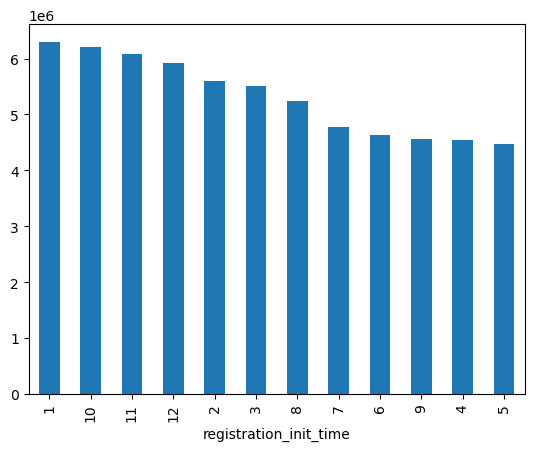

In [ ]:
members_df.registration_init_time.dt.month.value_counts().plot.bar()

<Axes: xlabel='city'>

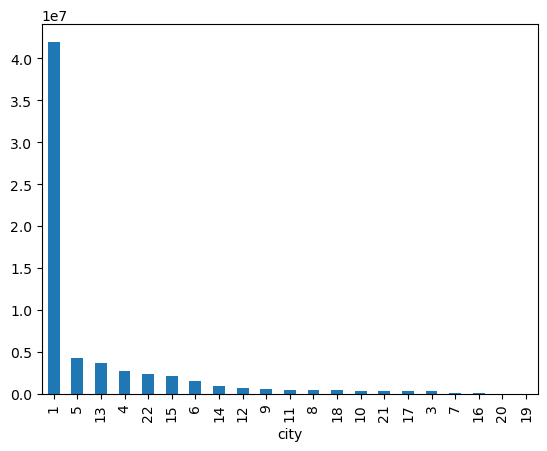

In [ ]:
members_df.city.value_counts().plot.bar()

In [ ]:
members_df.bd.value_counts()

bd
 0       39509864
 22       1220332
 21       1196188
 20       1183935
 27       1136339
           ...   
-497            2
-507            1
 1421           1
-501            1
-527            1
Name: count, Length: 385, dtype: int64

In [ ]:
members_df.gender.value_counts()

gender
male      13075425
female    12581644
Name: count, dtype: int64

In [ ]:
members_df.gender.isna().sum()

np.int64(38210177)

In [ ]:
members_df.registered_via.value_counts()

registered_via
4     19648219
3     18640987
9     16776651
7      8407395
11      269614
8        47588
5        18715
2        16847
16       10564
13        7546
14        7111
17        6630
19        5629
6         3380
1          254
10         104
-1          12
Name: count, dtype: int64

In [ ]:
members_df.is_ativo.value_counts()

is_ativo
False    52624381
True     11242865
Name: count, dtype: int64

<Axes: xlabel='is_ativo'>

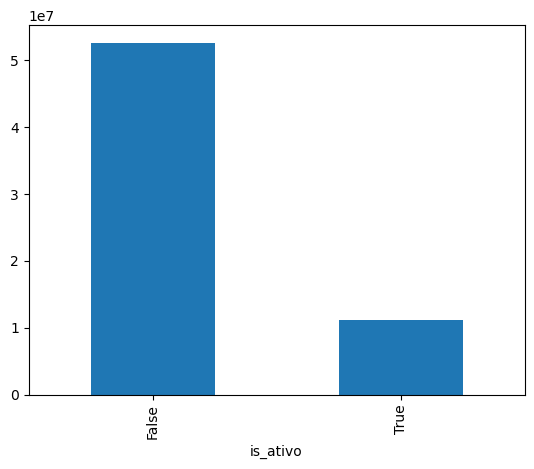

In [ ]:
members_df.is_ativo.value_counts().plot.bar()

In [ ]:
members_df.safra.describe()

count     63867246
unique          12
top         201612
freq       6287789
Name: safra, dtype: object